| **Inicio** | **atrás 4** | **Siguiente 6** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./4_Aprendizaje_No_Supervisado.ipynb)| [⏩](./6_Optimizacion_y_Ajuste__de_Modelos.ipynb)|

# **5. Aprendizaje Profundo (Deep Learning)**

## **Redes Neuronales Artificiales**

### **Arquitectura básica, función de activación**

Las redes neuronales artificiales (ANN) consisten en capas de neuronas interconectadas. La arquitectura básica incluye tres tipos de capas:

1. **Capa de Entrada (Input Layer):** Esta capa recibe las señales de entrada y transmite esas señales a la siguiente capa sin realizar ningún cálculo. El número de neuronas en esta capa depende de la cantidad de características o variables de entrada.

2. **Capas Ocultas (Hidden Layers):** Estas capas realizan cálculos mediante ponderaciones y funciones de activación. Puedes tener múltiples capas ocultas, y cada neurona en una capa está conectada a todas las neuronas de la capa siguiente.

3. **Capa de Salida (Output Layer):** Esta capa produce la salida final de la red. El número de neuronas en esta capa depende del tipo de problema (clasificación, regresión, etc.).

**Funciones de Activación:**

Las funciones de activación se utilizan para introducir no linealidades en la red. Algunas de las funciones de activación comunes son:

1. **Función Sigmoide:**

   $\sigma(x) = \frac{1}{1 + e^{-x}}$

   - Salida entre 0 y 1.
   - Utilizada en capas de salida para problemas de clasificación binaria.

2. **Función Tangente Hiperbólica (Tanh):**

   $\tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$

   - Salida entre -1 y 1.
   - Puede ser útil en capas ocultas.

3. **Función Rectificadora Lineal (ReLU):**

   $\text{ReLU}(x) = \max(0, x)$

   - Salida 0 para valores negativos, lineal para valores positivos.
   - Ampliamente utilizada en capas ocultas.

**Ejemplo en Código Python:**

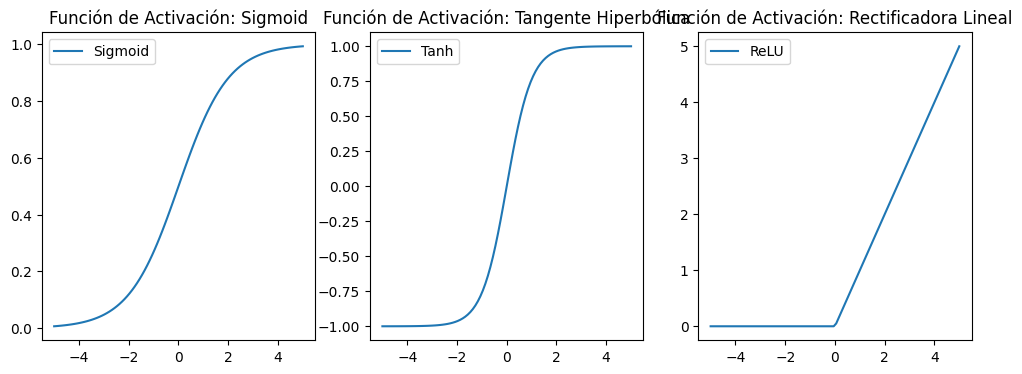

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones de activación
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# Datos para graficar
x = np.linspace(-5, 5, 100)

# Graficar funciones de activación
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.title('Función de Activación: Sigmoid')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(x, tanh(x), label='Tanh')
plt.title('Función de Activación: Tangente Hiperbólica')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(x, relu(x), label='ReLU')
plt.title('Función de Activación: Rectificadora Lineal')
plt.legend()

plt.show()

Este código grafica las funciones de activación sigmoide, tangente hiperbólica y rectificadora lineal en el rango de -5 a 5. Ajusta los parámetros según tus necesidades.

### **Retropropagación (backpropagation)**

La retropropagación es un algoritmo utilizado para entrenar redes neuronales mediante la minimización de la función de pérdida. A continuación, se presenta una explicación detallada del proceso, incluidas las fórmulas matemáticas clave.

**Pasos de Retropropagación:**

1. **Inicialización:**

   - Inicializar los pesos y los sesgos de la red neuronal.

2. **Propagación hacia Adelante (Forward Propagation):**

   - Calcular la salida de la red para una entrada dada.

3. **Cálculo de Pérdida:**

   - Calcular la diferencia entre la salida predicha y la salida real utilizando una función de pérdida.

4. **Propagación hacia Atrás (Backward Propagation):**

   - Calcular las derivadas parciales de la función de pérdida con respecto a los pesos y sesgos utilizando la regla de la cadena.
   - Actualizar los pesos y sesgos utilizando gradient descent u otro algoritmo de optimización.

5. **Repetir:**

   - Repetir los pasos 2-4 hasta que la función de pérdida converja o hasta alcanzar un número máximo de iteraciones.

**Fórmulas Matemáticas:**

1. **Función de Pérdida (L):**

   - La función que mide la diferencia entre la salida predicha y la salida real.

   $L = \frac{1}{2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2$

   Donde $(N)$ es el número de salidas, $(y_i)$ es la salida real, y $(\hat{y}_i)$ es la salida predicha.

2. **Gradiente de la Función de Pérdida (dL/dW y dL/dB):**

   - La derivada parcial de la función de pérdida con respecto a los pesos $(W)$ y sesgos $(B)$.

   $\frac{\partial L}{\partial W} = - (y - \hat{y}) \cdot X$

   $\frac{\partial L}{\partial B} = - (y - \hat{y})$

3. **Actualización de Pesos y Sesgos:**

   - Actualizar los pesos y sesgos utilizando el gradiente descendente.

   $W_{\text{nuevo}} = W_{\text{viejo}} - \alpha \frac{\partial L}{\partial W}$

   $B_{\text{nuevo}} = B_{\text{viejo}} - \alpha \frac{\partial L}{\partial B}$

   Donde $(\alpha)$ es la tasa de aprendizaje.

**Ejemplo en Código Python:**

In [3]:
import numpy as np

# Función de Pérdida
def loss(y_true, y_pred):
    return 0.5 * np.sum((y_true - y_pred)**2)

# Gradiente de la Función de Pérdida
def gradient(y_true, y_pred, X):
    dLdW = -np.dot((y_true - y_pred), X)
    dLdB = -np.sum(y_true - y_pred)
    return dLdW, dLdB

# Actualización de Pesos y Sesgos
def update_weights(W, B, dLdW, dLdB, learning_rate):
    W_new = W - learning_rate * dLdW
    B_new = B - learning_rate * dLdB
    return W_new, B_new

# Ejemplo de Uso
X = np.array([[0.5, 0.7]])
y_true = np.array([1.0])

# Inicialización de Pesos y Sesgos
W = np.random.rand(2)
B = np.random.rand(1)

# Propagación hacia Adelante
y_pred = np.dot(X, W) + B

# Cálculo de Pérdida
loss_value = loss(y_true, y_pred)

# Retropropagación
dLdW, dLdB = gradient(y_true, y_pred, X)

# Actualización de Pesos y Sesgos
learning_rate = 0.01
W, B = update_weights(W, B, dLdW, dLdB, learning_rate)

Este código representa una implementación simple de la retropropagación en un contexto de regresión lineal. Ajusta los parámetros según tus necesidades y la arquitectura de tu red neuronal.

## **Redes Neuronales Convolucionales (CNN)**

### **Aplicaciones en visión por computadora**

Las Redes Neuronales Convolucionales (CNN) son un tipo de red neuronal especialmente diseñado para el procesamiento eficiente de datos en forma de cuadrículas, como imágenes. Estas redes son capaces de aprender patrones locales mediante el uso de capas de convolución y reducen la cantidad de parámetros mediante la compartición de pesos.

**Arquitectura Básica de una CNN:**

1. **Capa de Entrada (Input Layer):**

   - Representa la imagen de entrada.

2. **Capas de Convolución (Convolutional Layers):**

   - Detectan patrones locales mediante filtros convolucionales.
   - Aplican convoluciones para generar mapas de características.

3. **Capas de Activación (Activation Layers):**

   - Introducen funciones de activación (como ReLU) para introducir no linealidades.
   - Ayudan a la red a aprender representaciones más complejas.

4. **Capas de Agrupación (Pooling Layers):**

   - Reducen el tamaño espacial de las representaciones y los cálculos en el mapa de características.
   - Ayudan a hacer que la representación sea invariante a pequeñas traslaciones y distorsiones.

5. **Capas Fully Connected (Fully Connected Layers):**

   - Neuronas conectadas a todas las neuronas de la capa anterior.
   - Realizan tareas finales como clasificación.

6. **Capa de Salida (Output Layer):**

   - Produce la salida final, que podría ser una probabilidad de clase en el caso de clasificación.

**Fórmulas Matemáticas:**

1. **Operación de Convolución:**

   $S(i, j) = (I * K)(i, j) = \sum_{m}\sum_{n} I(i+m, j+n) \cdot K(m, n)$

   Donde $S(i, j)$ es el valor del píxel en la posición $(i, j)$ del mapa de características resultante, $(I)$ es la imagen de entrada y $(K)$ es el núcleo convolucional.

2. **Función de Activación (ReLU):**

   $f(x) = \max(0, x)$

3. **Operación de Agrupación (Max Pooling):**

   $P(i, j) = \max\left(P_{\text{stride}} \times i, P_{\text{stride}} \times j\right)$

**Ejemplo en Código Python:**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Crear una arquitectura básica de CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Mostrar la arquitectura de la CNN
model.summary()

# Cargar datos de ejemplo (MNIST)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocesamiento de datos
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy: {test_acc}')

# Visualizar resultados
def plot_conv_layer(layer, image):
    filters, biases = layer.get_weights()
    filters = filters[:, :, 0, :]

    plt.figure(figsize=(8, 8))
    for i in range(filters.shape[3]):
        f = filters[:, :, i]
        plt.subplot(8, 8, i+1)
        plt.imshow(f, cmap='gray')
        plt.axis('off')

    plt.show()

# Visualizar filtros de la primera capa de convolución
first_conv_layer = model.layers[0]
plot_conv_layer(first_conv_layer, test_images[0].reshape(1, 28, 28, 1))

Este código utiliza TensorFlow

 y Keras para crear una CNN básica, entrenarla en el conjunto de datos MNIST y visualizar los filtros de la primera capa de convolución. Ajusta los parámetros según sea necesario para tus necesidades específicas.

## **Redes Neuronales Recurrentes (RNN)**

### **Aplicaciones en secuencias temporales**

Las Redes Neuronales Recurrentes (RNN) son un tipo especial de red neuronal diseñado para trabajar con datos secuenciales, donde la información tiene una dependencia temporal. A diferencia de las redes feedforward tradicionales, las RNN tienen conexiones cíclicas que les permiten mantener y utilizar información de estados anteriores.

**Arquitectura Básica de una RNN:**

1. **Capa de Entrada (Input Layer):**

   - Representa la entrada en cada paso de tiempo.

2. **Capa Oculta Recurrente (Recurrent Hidden Layer):**

   - Mantiene una representación interna y lleva la información de un paso de tiempo al siguiente.
   - La información se comparte entre diferentes pasos de tiempo a través de conexiones recurrentes.

3. **Capa de Salida (Output Layer):**

   - Produce la salida para cada paso de tiempo.

**Fórmulas Matemáticas:**

1. **Operación en la Capa Oculta Recurrente:**

   $h_t = \text{tanh}(W_{hh} \cdot h_{t-1} + W_{xh} \cdot x_t)$

   Donde:

   - $( h_t )$ es el estado oculto en el tiempo $( t )$.
   - $( W_{hh} )$ y $( W_{xh} )$ son matrices de pesos.
   - $( h_{t-1} )$ es el estado oculto en el tiempo anterior.
   - $( x_t )$ es la entrada en el tiempo $( t )$.

2. **Operación en la Capa de Salida:**

   $o_t = \text{softmax}(W_{ho} \cdot h_t)$

   Donde:

   - $( o_t )$ es la salida en el tiempo $( t )$.
   - $( W_{ho} )$ es la matriz de pesos para la capa de salida.
   - $(\text{softmax})$ es la función de activación softmax.

**Ejemplo en Código Python:**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

# Crear datos de ejemplo (serie temporal seno)
timesteps = np.linspace(0, 10, 100)
data = np.sin(timesteps) + np.random.normal(scale=0.1, size=100)

# Preprocesar los datos para entrenar una RNN
def create_dataset(data, timesteps):
    x, y = [], []
    for i in range(len(data) - timesteps):
        x.append(data[i:i+timesteps])
        y.append(data[i+timesteps])
    return np.array(x), np.array(y)

x, y = create_dataset(data, timesteps=5)

# Crear modelo de RNN
model = Sequential()
model.add(SimpleRNN(32, activation='tanh', input_shape=(5, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Ajustar el modelo
model.fit(x, y, epochs=50, verbose=0)

# Predecir con el modelo entrenado
x_new, _ = create_dataset(np.sin(np.linspace(10, 20, 100)), timesteps=5)
y_pred = model.predict(x_new[:, :, np.newaxis])

# Visualizar resultados
plt.plot(timesteps, data, label='Serie Temporal Original')
plt.plot(np.linspace(10, 20, 100), y_pred, label='Predicción con RNN', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

Este código utiliza TensorFlow y Keras para crear una RNN simple y entrenarla en una serie temporal sintética. Ajusta los parámetros según sea necesario para tus necesidades específicas.

| **Inicio** | **atrás 4** | **Siguiente 6** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./4_Aprendizaje_No_Supervisado.ipynb)| [⏩](./6_Optimizacion_y_Ajuste__de_Modelos.ipynb)|